In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
G = nx.DiGraph() # graph
file = input('Print absolute or relative path to the file: ')
output = input('Print output file: ')

# nodes count
NV = 0

# edges count
NE = 0

with open(file, 'r') as fp:
  content = fp.read()
  NV = int(content[0])
  NE = int(content[2])
  fp.seek(7, 0)
  edges = [tuple(map(int, s.split())) for s in fp.readlines(5 * (NE-2))]
  G.add_edges_from(edges)

Print absolute or relative path to the file: input.txt
Print output file: output.txt


In [4]:
# filling edges attributes
for i in range(len(G.edges)):
  edge = list(G.edges)[i]
  value = float(input(f'Print value of {edge} edge weight: '))
  attr = {edge: {'weight': value}}
  nx.set_edge_attributes(G, attr)

G.edges.data()

Print value of (1, 2) edge weight: 4
Print value of (2, 4) edge weight: 5
Print value of (4, 5) edge weight: 3
Print value of (3, 4) edge weight: 2
Print value of (5, 7) edge weight: 6
Print value of (6, 5) edge weight: 9
Print value of (7, 6) edge weight: 6
Print value of (7, 8) edge weight: 4


OutEdgeDataView([(1, 2, {'weight': 4.0}), (2, 4, {'weight': 5.0}), (4, 5, {'weight': 3.0}), (3, 4, {'weight': 2.0}), (5, 7, {'weight': 6.0}), (6, 5, {'weight': 9.0}), (7, 6, {'weight': 6.0}), (7, 8, {'weight': 4.0})])

In [5]:
# filling nodes attributes
for i in range(len(G.nodes)):
  node = list(G.nodes)[i]
  value = float(input(f'Print value of {node} node weight: '))
  attr = {node: {'weight': value}}
  nx.set_node_attributes(G, attr)

G.nodes.data()

Print value of 1 node weight: 6
Print value of 2 node weight: 10
Print value of 4 node weight: 15
Print value of 3 node weight: 23
Print value of 5 node weight: 12
Print value of 6 node weight: 5
Print value of 7 node weight: 7
Print value of 8 node weight: 1


NodeDataView({1: {'weight': 6.0}, 2: {'weight': 10.0}, 4: {'weight': 15.0}, 3: {'weight': 23.0}, 5: {'weight': 12.0}, 6: {'weight': 5.0}, 7: {'weight': 7.0}, 8: {'weight': 1.0}})

In [6]:
nodes = G.nodes()
edges = G.edges()

print(f"Nodes: {nodes}\nEdges: {edges}")

Nodes: [1, 2, 4, 3, 5, 6, 7, 8]
Edges: [(1, 2), (2, 4), (4, 5), (3, 4), (5, 7), (6, 5), (7, 6), (7, 8)]


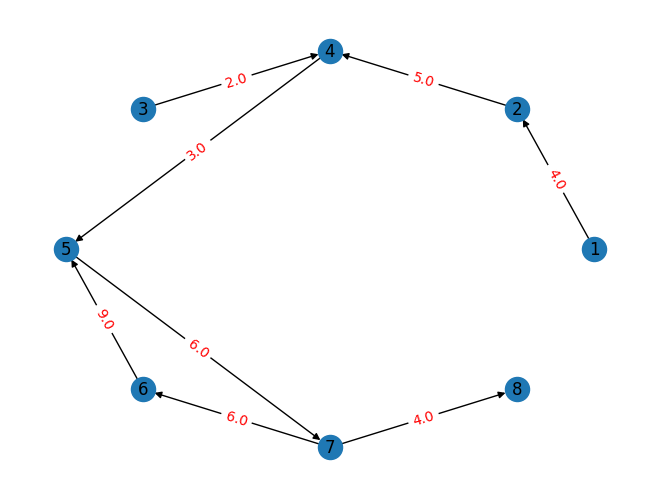

In [34]:
# graph visualization
pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()

In [22]:
nx.get_edge_attributes(G, 'weight')

{(1, 2): 4.0,
 (2, 4): 5.0,
 (4, 5): 3.0,
 (3, 4): 2.0,
 (5, 7): 6.0,
 (6, 5): 9.0,
 (7, 6): 6.0,
 (7, 8): 4.0}

In [7]:
def visualize(G):
  """Visualize graph"""
  pos = nx.circular_layout(G)
  edge_labels = nx.get_edge_attributes(G, 'weight')
  node_labels = nx.get_node_attributes(G, 'weight')

  nx.draw(G, pos=pos, with_labels=True, node_size=1000)
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
  nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=0.1)

  plt.show()

In [8]:
def isReal(string):
  """Checks if string is a real number"""
  try:
      float(string)
  except ValueError:
      return False
  return True

In [9]:
def get_input_edges(G, node):
  """Returns list of node's input edges"""
  input_edges = []
  edges = G.edges()

  for edge in edges:
    if edge[1] == node:
      input_edges.append(edge)

  return input_edges

In [10]:
def min_edge_attr(G, edges):
  """Calculates a minimum attribute value of the given edges"""
  edges_attr = []

  for edge in edges:
    attr = G.edges[edge[0], edge[1]]['weight']
    edges_attr.append(attr)

  if len(edges_attr) > 0:
    return min(edges_attr)

  return 0

In [11]:
def mul(G, input_edges, left_node):
  """Multiply input edges attributes and left node attribute"""
  result = 1

  for edge in input_edges:
    result *= G.edges[edge[0], edge[1]]['weight']

  return result * left_node

In [ ]:
with open(file, 'r') as fp:
  result = [] # result of the agent-function
  fp.seek((5*NE)+9, 0)
  content = fp.readlines()

  for i in range(NV + NE):
    s = content[i] # current line
    j = -1 # for edges list
    current_node = 0
    current_edge = ()

    if i < NV:
      current_node = list(G.nodes)[i]
    else:
      j += 1
      current_edge = list(G.edges)[j]

    if isReal(s): # if current line is a real number
      if i < NV:
        attr = {current_node: {'weight': float(s)}}
        nx.set_node_attributes(G, attr)
        result.append(float(s))
      else:
        attr = {current_edge: {'weight': float(s)}}
        nx.set_edge_attributes(G, attr)
        result.append(float(s))

    elif s[0] == 'e': # if copy attr value from particular edge
      if i < NV:
        edge_number = int(s[2]) # index of edge in G.edges list
        edge = list(G.edges())[edge_number - 1]
        value = G.edges[edge[0], edge[1]]['weight']
        attr = {current_node: {'weight': value}}
        nx.set_node_attributes(G, attr)
        result.append(value)
      else:
        edge_number = int(s[2])
        edge = list(G.edges())[edge_number - 1]
        value = G.edges[edge[0], edge[1]]['weight']
        attr = {current_edge: {'weight': value}}
        nx.set_edge_attributes(G, attr)
        result.append(value)

    elif s[0] == 'v': # if copy attr value from particular node
      if i < NV:
        node_number = int(s[2]) # index of node in G.nodes list
        node = list(G.nodes())[node_number - 1]
        value = G.nodes[node]['weight']
        attr = {current_node: {'weight': value}}
        nx.set_node_attributes(G, attr)
        result.append(value)
      else:
        node_number = int(s[2])
        node = list(G.nodes())[node_number - 1]
        value = G.nodes[node]['weight']
        attr = {current_edge: {'weight': value}}
        nx.set_edge_attributes(G, attr)
        result.append(value)

    elif s == 'min\n':
        input_edges = get_input_edges(G, i) # get input edges list of particular node
        m = min_edge_attr(G, input_edges) # calculates minimum attr value of input edges
        result.append(m)

    elif s == '*\n':
      left_node = current_edge[0] # get left node of the current edge
      input_edges = get_input_edges(G, left_node) # get input edges of the left node
      value = mul(G, input_edges, left_node) # multiply input edges attrs and left node attr
      G.edges[current_edge[0], current_edge[1]]['weight'] = value
      result.append(value)

In [ ]:
# write result values into output file
with open(output, 'w') as fp:
  for num in result:
    fp.write(str(num) + '\n')